In [2]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

In [3]:
### load the meta data

metadata = []
with gzip.open('meta_Luxury_Beauty.json.gz') as f:
    for l in f:
        metadata.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(metadata))

# first row of the list
print(metadata[0])

12299
{'category': [], 'tech1': '', 'description': ['After a long day of handling thorny situations, our new hand therapy pump is just the help you need. It contains shea butter as well as extracts of yarrow, clover and calendula to help soothe and condition work-roughened hands.', 'By Crabtree & Evelyn', 'The aromatic benefits of herbs are varied and far-reaching, so we combined a whole bunch of them into one restoratively fragrant line-up straight from the garden.', 'We&#039;ve formulated our Gardeners Hand Therapy with Myrrh Extract to help condition nails and cuticles as well as skin super hydrators macadamia seed oil and shea butter to help replenish lost moisture. Rich in herbal extracts like cooling cucumber and rosemary leaf  a favourite for antioxidants  to help protect hands against daily urban and environmental stresses while the hydrating power of Vitamin E, Hyaluronic Acid and Ceramides contribute to improve the skins natural moisture barrier with this garden-inspired trea

In [4]:
# convert list into pandas dataframe

metadata_df = pd.DataFrame.from_dict(metadata)

print(len(metadata_df))

12299


In [5]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         12299 non-null  object
 1   tech1            12299 non-null  object
 2   description      12299 non-null  object
 3   fit              12299 non-null  object
 4   title            12299 non-null  object
 5   also_buy         12299 non-null  object
 6   tech2            12299 non-null  object
 7   brand            12299 non-null  object
 8   feature          12299 non-null  object
 9   rank             12299 non-null  object
 10  also_view        12299 non-null  object
 11  details          12299 non-null  object
 12  main_cat         12299 non-null  object
 13  similar_item     12299 non-null  object
 14  date             12299 non-null  object
 15  price            12299 non-null  object
 16  asin             12299 non-null  object
 17  imageURL         12299 non-null

In [6]:
metadata_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,,,B0000531EN,[],[]
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,,,B0000532JH,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,,$15.99,B00005A77F,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,,$18.00,B00005NDTD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [7]:
unique_products = metadata_df['asin'].nunique()
print(f'Total number of unique products: {unique_products}')


Total number of unique products: 12111


In [8]:
process_metadata = metadata_df.copy()
process_metadata.isnull().sum()

category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
asin               0
imageURL           0
imageURLHighRes    0
dtype: int64

In [9]:
# Assuming you have a DataFrame named df
# Convert the "rank" column to numeric (assuming they are integers)
metadata_df['rank'] = pd.to_numeric(metadata_df['rank'], errors='coerce')

# Sort the DataFrame by the "rank" column in ascending order
top_10_products = metadata_df.sort_values(by='rank').head(10)


In [10]:
process_metadata = metadata_df.copy()
process_metadata.isnull().sum()

category               0
tech1                  0
description            0
fit                    0
title                  0
also_buy               0
tech2                  0
brand                  0
feature                0
rank               12299
also_view              0
details                0
main_cat               0
similar_item           0
date                   0
price                  0
asin                   0
imageURL               0
imageURLHighRes        0
dtype: int64

In [11]:
process_metadata = process_metadata[['asin', 'title', 'description', 'price', 'imageURLHighRes']]
process_metadata.head()

,asin,title,description,price,imageURLHighRes
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[After a long day of handling thorny situation...,$30.00,[https://images-na.ssl-images-amazon.com/image...
1,B0000531EN,AHAVA Bath Salts,[If you haven't experienced the pleasures of b...,,[]
2,B0000532JH,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4","[Rich, black mineral mud, harvested from the b...",,[https://images-na.ssl-images-amazon.com/image...
3,B00005A77F,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[This liquid soap with convenient pump dispens...,$15.99,[https://images-na.ssl-images-amazon.com/image...
4,B00005NDTD,Soy Milk Hand Crme,[Remember why you love your favorite blanket? ...,$18.00,[https://images-na.ssl-images-amazon.com/image...


In [12]:
# Assuming 'your_dataframe' is your DataFrame
process_metadata = process_metadata.drop_duplicates(subset='asin', keep='first')
len(process_metadata)

12111

In [13]:
process_metadata.head()

,asin,title,description,price,imageURLHighRes
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[After a long day of handling thorny situation...,$30.00,[https://images-na.ssl-images-amazon.com/image...
1,B0000531EN,AHAVA Bath Salts,[If you haven't experienced the pleasures of b...,,[]
2,B0000532JH,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4","[Rich, black mineral mud, harvested from the b...",,[https://images-na.ssl-images-amazon.com/image...
3,B00005A77F,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[This liquid soap with convenient pump dispens...,$15.99,[https://images-na.ssl-images-amazon.com/image...
4,B00005NDTD,Soy Milk Hand Crme,[Remember why you love your favorite blanket? ...,$18.00,[https://images-na.ssl-images-amazon.com/image...


In [14]:
missing_values = process_metadata.isnull().sum()
missing_values

asin               0
title              0
description        0
price              0
imageURLHighRes    0
dtype: int64

In [15]:
# Assuming you have a DataFrame named 'your_dataframe' with a column 'imageURL' that contains image URLs
empty_image_count = process_metadata['imageURLHighRes'].apply(len).eq(0).sum()
print(f"Number of empty image lists: {empty_image_count}")


Number of empty image lists: 2036


In [16]:
# Drop rows where 'imageURL' is an empty list
process_metadata = process_metadata[process_metadata['imageURLHighRes'].apply(len) > 0]
len(process_metadata)

10075

In [17]:
unique_products = process_metadata['asin'].nunique()
print(f'Total number of unique products: {unique_products}')


Total number of unique products: 10075


In [18]:
process_metadata = process_metadata.dropna(subset=['price'])


In [19]:
filtered_df = process_metadata[process_metadata['price'] >= '$30.00']


In [20]:
filtered_df.head()

,asin,title,description,price,imageURLHighRes
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,[After a long day of handling thorny situation...,$30.00,[https://images-na.ssl-images-amazon.com/image...
10,B000068DWY,"Calvin Klein ck one Eau de Toilette, 3.4 fl. oz.",[Purity. Unity. Fresh. The revolutionary first...,$64.00,[https://images-na.ssl-images-amazon.com/image...
12,B00008WFSM,Helen of Troy 1193 Professional Flat Iron,[ABOUT THE PRODUCT: The Hot Tools 2 24K Gold F...,$39.99,[https://images-na.ssl-images-amazon.com/image...
13,B0000Y3NO6,"DERMAdoctor Calm, Cool &amp; Corrected anti-re...",[],$85.00,[https://images-na.ssl-images-amazon.com/image...
17,B00011QUKW,HOT TOOLS Professional 24K Gold Marcel Iron/Wa...,"[Hot Tools HT1108 Professional Marcel Iron, 1 ...",$49.99,[https://images-na.ssl-images-amazon.com/image...


In [21]:
review_data = []
with gzip.open('Luxury_Beauty.json.gz') as f:
    for l in f:
        review_data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(review_data))

# first row of the list
print(review_data[30])

574628
{'image': ['https://images-na.ssl-images-amazon.com/images/I/71mN6agImFL._SY88.jpg'], 'overall': 4.0, 'verified': True, 'reviewTime': '03 9, 2018', 'reviewerID': 'AUEUNR2AQQ0SY', 'asin': 'B00004U9V2', 'style': {'Size:': ' 0.9 oz.'}, 'reviewerName': 'M. Martin', 'reviewText': 'I love this hand cream, especially the fragrance. Its light and herby. I tsoftens my hands without making them greasy. However, I did not pay attention to the size, and its a VERY small quantity for $8. So, the cream is great, but its not a good value.', 'summary': 'Love the cream; small tube.', 'unixReviewTime': 1520553600}


In [22]:
# convert list into pandas dataframe

review_df = pd.DataFrame.from_dict(review_data)

print(len(review_df))

574628


In [23]:
# Assuming your DataFrame is named process_reviews

# Use the nunique() function to count the number of unique reviewerIDs
total_unique_reviewers = review_df['reviewerID'].nunique()

print("Total number of unique reviewers:", total_unique_reviewers)


Total number of unique reviewers: 416174


In [24]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         574628 non-null  float64
 1   vote            103689 non-null  object 
 2   verified        574628 non-null  bool   
 3   reviewTime      574628 non-null  object 
 4   reviewerID      574628 non-null  object 
 5   asin            574628 non-null  object 
 6   reviewerName    574597 non-null  object 
 7   reviewText      574228 non-null  object 
 8   summary         574445 non-null  object 
 9   unixReviewTime  574628 non-null  int64  
 10  style           251013 non-null  object 
 11  image           7418 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 48.8+ MB


In [25]:
review_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [26]:
process_user_reviews = review_df[['reviewerID', 'asin', 'overall']]
process_user_reviews.head()

,reviewerID,asin,overall
0,A1Q6MUU0B2ZDQG,B00004U9V2,2.0
1,A3HO2SQDCZIE9S,B00004U9V2,5.0
2,A2EM03F99X3RJZ,B00004U9V2,5.0
3,A3Z74TDRGD0HU,B00004U9V2,5.0
4,A2UXFNW9RTL4VM,B00004U9V2,5.0


In [27]:
missing_values = process_user_reviews.isnull().sum()
missing_values

reviewerID    0
asin          0
overall       0
dtype: int64

In [28]:
process_reviews = review_df.copy()
process_reviews.isnull().sum()

overall                0
vote              470939
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          31
reviewText           400
summary              183
unixReviewTime         0
style             323615
image             567210
dtype: int64

In [29]:
count_of_zero_overall = len(review_df[review_df['overall'] == 0.0])
print(f"Number of items with an 'overall' rating of 0: {count_of_zero_overall}")

Number of items with an 'overall' rating of 0: 0


In [30]:
#missing vote means not voted so replce with zero

process_reviews['vote'] = process_reviews['vote'].fillna(0)

In [31]:
process_reviews['reviews'] = process_reviews['reviewText']+process_reviews['summary']

In [32]:
process_reviews['reviews']=process_reviews['reviews'].fillna('Missing')

In [33]:
process_reviews = process_reviews.drop(['reviewText', 'summary'], axis=1)
process_reviews.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,style,image,reviews
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,1276560000,NaN,NaN,"I bought two of these 8.5 fl oz hand cream, an..."
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,1262822400,NaN,NaN,"Believe me, over the years I have tried many, ..."
2,5.0,0,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,1524009600,{'Size:': ' 3.5 oz.'},NaN,Great hand lotionFive Stars
3,5.0,0,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,1524009600,{'Size:': ' 3.5 oz.'},NaN,This is the best for the severely dry skin on ...
4,5.0,0,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,1523923200,{'Size:': ' 3.5 oz.'},NaN,The best non- oily hand cream ever. It heals o...


In [34]:
#Figuring out the distribution of categories
process_reviews['overall'].value_counts()

5.0    382152
4.0     70481
1.0     50501
3.0     41988
2.0     29506
Name: overall, dtype: int64

In [35]:
#The function returns sentiment value 

def f(row):    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [36]:
process_reviews['sentiment'] = process_reviews.apply(f, axis=1)
process_reviews.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,style,image,reviews,sentiment
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,1276560000,NaN,NaN,"I bought two of these 8.5 fl oz hand cream, an...",Negative
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,1262822400,NaN,NaN,"Believe me, over the years I have tried many, ...",Positive
2,5.0,0,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,1524009600,{'Size:': ' 3.5 oz.'},NaN,Great hand lotionFive Stars,Positive
3,5.0,0,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,1524009600,{'Size:': ' 3.5 oz.'},NaN,This is the best for the severely dry skin on ...,Positive
4,5.0,0,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,1523923200,{'Size:': ' 3.5 oz.'},NaN,The best non- oily hand cream ever. It heals o...,Positive


In [37]:
process_reviews['sentiment'].value_counts()


Positive    452633
Negative     80007
Neutral      41988
Name: sentiment, dtype: int64

In [38]:
# new data frame which has date and year
new = process_reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
process_reviews["date"]= new[0] 
process_reviews["year"]= new[1] 

new = process_reviews["date"].str.split(" ", n = 1, expand = True) 

process_reviews["month"]= new[0] 
process_reviews["day"]= new[1] 

process_reviews=process_reviews.drop(['reviewTime'], axis=1)
process_reviews.head()

,overall,vote,verified,reviewerID,asin,reviewerName,unixReviewTime,style,image,reviews,sentiment,date,year,month,day
0,2.0,3,True,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,1276560000,NaN,NaN,"I bought two of these 8.5 fl oz hand cream, an...",Negative,06 15,2010,06,15
1,5.0,14,True,A3HO2SQDCZIE9S,B00004U9V2,chandra,1262822400,NaN,NaN,"Believe me, over the years I have tried many, ...",Positive,01 7,2010,01,7
2,5.0,0,True,A2EM03F99X3RJZ,B00004U9V2,Maureen G,1524009600,{'Size:': ' 3.5 oz.'},NaN,Great hand lotionFive Stars,Positive,04 18,2018,04,18
3,5.0,0,True,A3Z74TDRGD0HU,B00004U9V2,Terry K,1524009600,{'Size:': ' 3.5 oz.'},NaN,This is the best for the severely dry skin on ...,Positive,04 18,2018,04,18
4,5.0,0,True,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,1523923200,{'Size:': ' 3.5 oz.'},NaN,The best non- oily hand cream ever. It heals o...,Positive,04 17,2018,04,17


In [39]:
#remove unwanted columns 
process_reviews=process_reviews.drop(['reviewerName','unixReviewTime','style','image','date'], axis=1)

#Creating a copy 
clean_reviews=process_reviews.copy()
clean_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     574628 non-null  float64
 1   vote        574628 non-null  object 
 2   verified    574628 non-null  bool   
 3   reviewerID  574628 non-null  object 
 4   asin        574628 non-null  object 
 5   reviews     574628 non-null  object 
 6   sentiment   574628 non-null  object 
 7   year        574628 non-null  object 
 8   month       574628 non-null  object 
 9   day         574628 non-null  object 
dtypes: bool(1), float64(1), object(8)
memory usage: 40.0+ MB


In [40]:
clean_reviews.isnull().sum()

overall       0
vote          0
verified      0
reviewerID    0
asin          0
reviews       0
sentiment     0
year          0
month         0
day           0
dtype: int64

In [41]:
process_reviews['vote'] = pd.to_numeric(process_reviews['vote'], errors='coerce')

In [42]:
pd.DataFrame(process_reviews.groupby('sentiment')['vote'].mean())

,vote
sentiment,
Negative,2.545327
Neutral,1.369099
Positive,1.083846


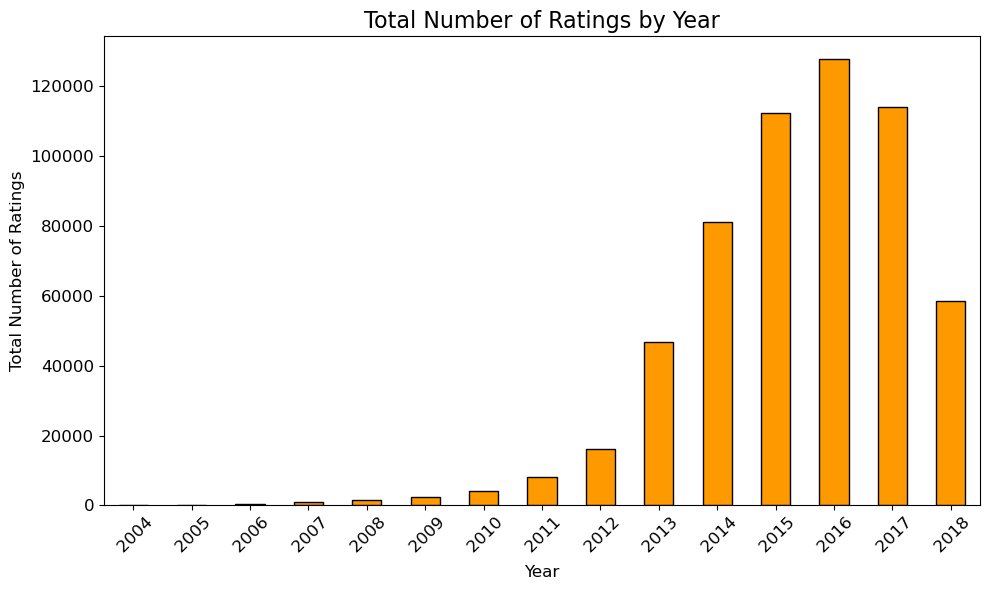

In [43]:
import matplotlib.pyplot as plt

# Group the data by year and calculate the total number of ratings
total_ratings_by_year = process_reviews.groupby('year')['overall'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = total_ratings_by_year.plot(kind='bar', color='#FF9900', edgecolor='black')

# Title and labels
ax.set_title('Total Number of Ratings by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Number of Ratings', fontsize=12)

# Adjust the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


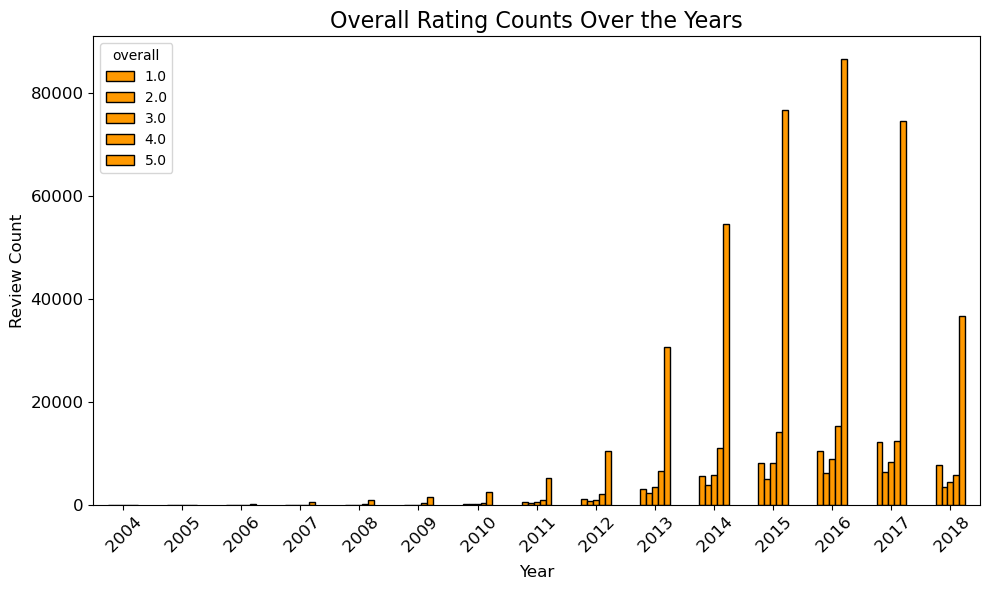

In [44]:
import matplotlib.pyplot as plt

# Group the data by year and overall rating, and count the reviews
overall_counts = process_reviews.groupby(['year', 'overall'])['overall'].count().unstack()

# Create a bar plot for overall ratings over the years with the specified color
ax = overall_counts.plot(kind='bar', color='#FF9900', figsize=(10, 6), edgecolor='black')

# Title and labels
ax.set_title('Overall Rating Counts Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Review Count', fontsize=12)

# Adjust the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'year' column to string
process_reviews['year'] = process_reviews['year'].astype(str)

# Filter the DataFrame for the year 2018
df_filtered = process_reviews[process_reviews['year'].astype(int) >= 2016]

# Group the data by the 'overall' column and count the occurrences of each rating
rating_counts = df_2018['overall'].value_counts().sort_index()

# Create labels for the pie chart
labels = rating_counts.index

# Define colors for the pie slices
colors = ['#e17b00', '#fa9400', '#ffb71e', '#FFCC99', '#b36b00']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Rating Distribution for >= 2016', fontsize=16)

# Show the plot
plt.axis('equal')
plt.show()


NameError: name 'df_2018' is not defined

In [47]:
# Assuming your DataFrame is named process_reviews
process_reviews['year'] = process_reviews['year'].astype(int)  # Convert 'year' to integer
records_count = len(process_reviews[process_reviews['year'] >= 2014])
print("Number of records with year greater than or equal to 2014:", records_count)


Number of records with year greater than or equal to 2014: 494312


In [48]:
records_count = len(process_reviews[process_reviews['year'] >= 2015])
print("Number of records with year greater than or equal to 2014:", records_count)

Number of records with year greater than or equal to 2014: 413065


In [49]:
records_count = len(process_reviews[process_reviews['year'] >= 2016])
print("Number of records with year greater than or equal to 2014:", records_count)

Number of records with year greater than or equal to 2014: 300564


In [50]:
# Assuming your DataFrame is named process_reviews
selected_records = process_reviews[process_reviews['year'] >= 2016]
len(selected_records)

300564

In [51]:
user_product_counts = process_reviews.groupby('reviewerID')['asin'].nunique()

# Sort the result in descending order
user_product_counts = user_product_counts.sort_values(ascending=False)

# Select the top 50 users
top_50_users = user_product_counts.head(50)


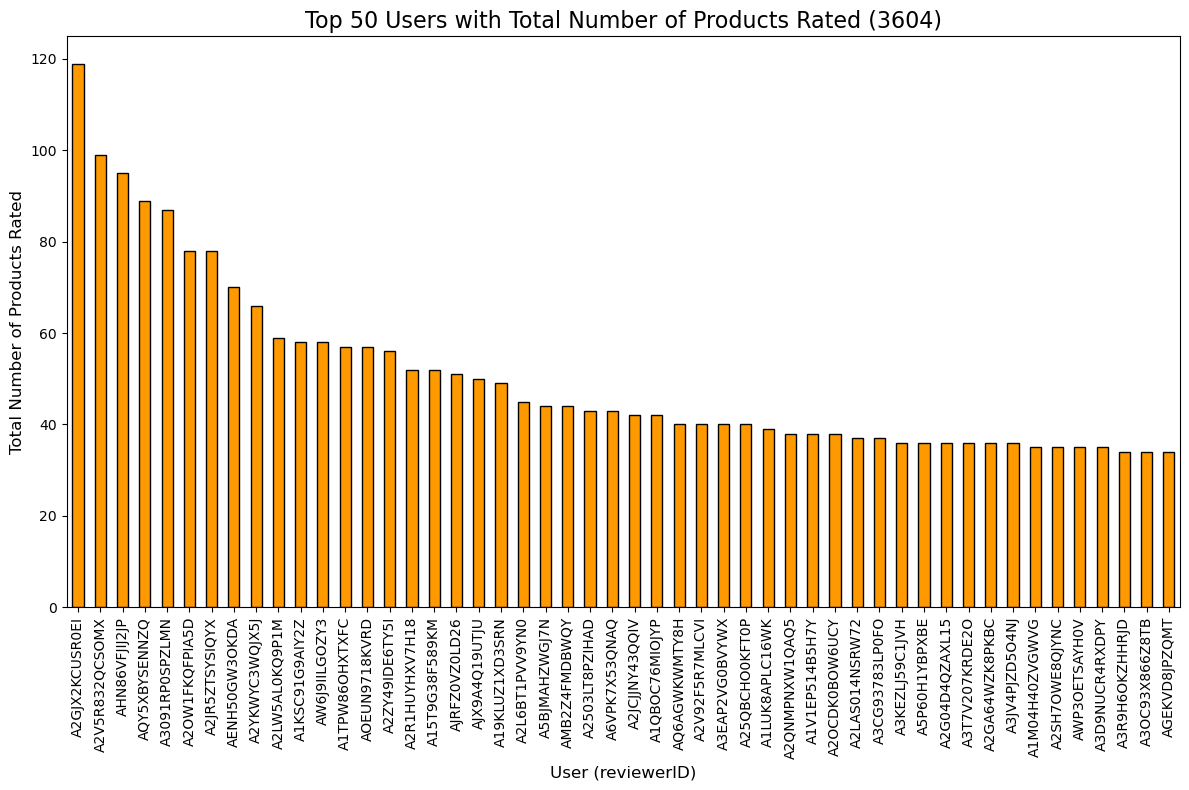

In [52]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the 'top_50_users' Series as mentioned in the previous response

# Create a bar plot to visualize the top 50 users
plt.figure(figsize=(12, 8))
top_50_users.plot(kind='bar', color='#FF9900', edgecolor='black')

# Title and labels
plt.title('Top 50 Users with Total Number of Products Rated (3604)', fontsize=16)
plt.xlabel('User (reviewerID)', fontsize=12)
plt.ylabel('Total Number of Products Rated', fontsize=12)

# Adjust the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [53]:
# Assuming your DataFrame is named process_reviews

# Group the data by 'reviewerID' and calculate the total number of ratings
reviewer_ratings = process_reviews['reviewerID'].value_counts()

# Select the top 5 reviewers
top_5_reviewers = reviewer_ratings.head(100)

# Create a new DataFrame containing only the records of the top 5 reviewers
top_5_reviews = process_reviews[process_reviews['reviewerID'].isin(top_5_reviewers.index)]

len(top_5_reviews)

5268

In [54]:
# Assuming your DataFrame is named process_reviews

# Use the nunique() function to count the number of unique reviewerIDs
total_unique_reviewers = process_reviews['reviewerID'].nunique()

print("Total number of unique reviewers:", total_unique_reviewers)


Total number of unique reviewers: 416174


In [55]:
# Assuming your DataFrame is named process_reviews

# Group the data by 'asin' (product ID) and calculate the number of unique reviewers for each product
product_reviewer_counts = process_reviews.groupby('asin')['reviewerID'].nunique()

# Sort the result in descending order to find the products with the most reviewers
product_reviewer_counts = product_reviewer_counts.sort_values(ascending=False)

# Select the top products that have been rated by many reviewers, for example, the top 10 products
top_products = product_reviewer_counts.head(10)

# The 'top_products' Series contains the top products with the most reviewers


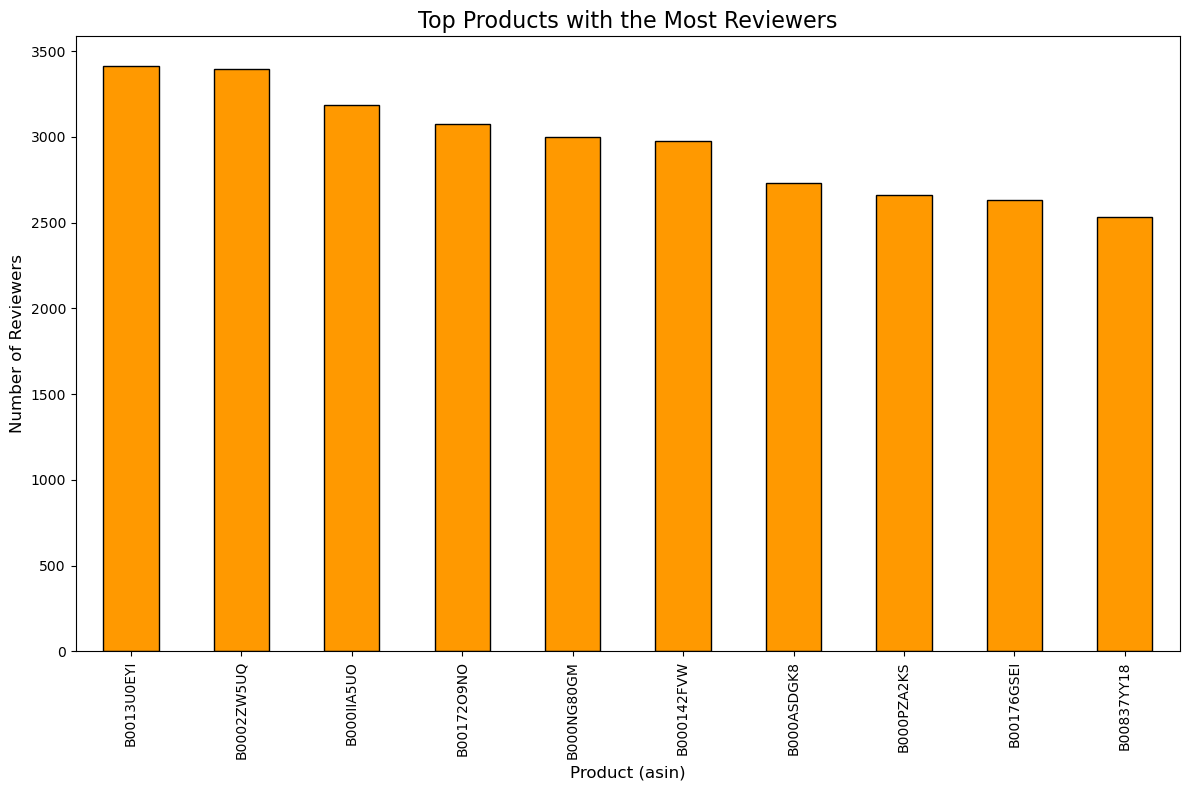

In [56]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the 'top_products' Series as mentioned in the previous response

# Create a bar plot to visualize the top products
plt.figure(figsize=(12, 8))
top_products.plot(kind='bar', color='#FF9900', edgecolor='black')

# Title and labels
plt.title('Top Products with the Most Reviewers', fontsize=16)
plt.xlabel('Product (asin)', fontsize=12)
plt.ylabel('Number of Reviewers', fontsize=12)

# Adjust the x-axis labels for better visibility
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [57]:
# Assuming you have a DataFrame named process_reviews
false_count = (process_reviews['label_match'] == False).sum()

print("Number of False values in 'label_match':", false_count)


KeyError: 'label_match'

In [ ]:
# Assuming you have a DataFrame named process_reviews

# Select the first 5 entries where label_match is False
false_entries = process_reviews[process_reviews['label_match'] == False].head(5)

# Display the 'reviewText,' 'overall,' and 'sentiment_label' for these entries
for index, row in false_entries.iterrows():
    print(f"Review Text {index}: {row['reviews']}")
    print(f"Overall Rating {index}: {row['overall']}")
    print(f"Sentiment Label {index}: {row['sentiment_label']}\n")


In [58]:
# Assuming 'asin' is the common column
copy_process_metadata = process_metadata.copy()
merged_df = process_reviews.merge(copy_process_metadata[['asin', 'title', 'description', 'price', 'imageURLHighRes']], on='asin', how='inner')

# 'merged_df' now contains the reviews with the corresponding product title
merged_df = merged_df[['asin', 'title', 'overall', 'price','imageURLHighRes', 'year']]

In [59]:
merged_df.head()

,asin,title,overall,price,imageURLHighRes,year
0,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,2.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2010
1,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2010
2,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018
3,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018
4,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018


In [60]:
# Assuming your DataFrame is named 'df'
filtered_df = merged_df[merged_df['year'].astype(int) == 2018]


In [61]:
filtered_df.head()

,asin,title,overall,price,imageURLHighRes,year
2,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018
3,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018
4,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018
5,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018
6,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018


In [62]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534602 entries, 0 to 534601
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   asin             534602 non-null  object 
 1   title            534602 non-null  object 
 2   overall          534602 non-null  float64
 3   price            534602 non-null  object 
 4   imageURLHighRes  534602 non-null  object 
 5   year             534602 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 28.6+ MB


In [63]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55484 entries, 2 to 534590
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   asin             55484 non-null  object 
 1   title            55484 non-null  object 
 2   overall          55484 non-null  float64
 3   price            55484 non-null  object 
 4   imageURLHighRes  55484 non-null  object 
 5   year             55484 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


In [64]:
# Assuming your DataFrame is named 'df'
unique_asin_df = filtered_df.drop_duplicates(subset=['asin'])


In [65]:
unique_asin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5673 entries, 2 to 534590
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   asin             5673 non-null   object 
 1   title            5673 non-null   object 
 2   overall          5673 non-null   float64
 3   price            5673 non-null   object 
 4   imageURLHighRes  5673 non-null   object 
 5   year             5673 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 310.2+ KB


In [66]:
unique_asin_df.shape

(5673, 6)

In [67]:
# Assuming your DataFrame is named 'df'
cleaned_df = unique_asin_df.dropna(subset=['price', 'imageURLHighRes'])


In [68]:
unique_asin_df.head()

,asin,title,overall,price,imageURLHighRes,year
2,B00004U9V2,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,5.0,$30.00,[https://images-na.ssl-images-amazon.com/image...,2018
590,B00005A77F,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",5.0,$15.99,[https://images-na.ssl-images-amazon.com/image...,2018
670,B00005NDTD,Soy Milk Hand Crme,5.0,$18.00,[https://images-na.ssl-images-amazon.com/image...,2018
696,B00005V50C,Supersmile Powdered Mouthrinse,3.0,$21.73,[https://images-na.ssl-images-amazon.com/image...,2018
714,B00005V50B,Supersmile Professional Teeth Whitening Toothp...,2.0,$23.00,[https://images-na.ssl-images-amazon.com/image...,2018


In [69]:
# Save the DataFrame to a CSV file
unique_asin_df.to_csv('products_2018.csv', index=False)


In [70]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'title' and 'overall'
# Group the data by 'title' and sum the overall ratings for each product title
product_ratings = merged_df.groupby('title')['overall'].sum()

# Sort the product ratings in descending order and select the top 10 products
top_10_products = product_ratings.sort_values(ascending=False).head(10)

# Print the top 10 products
print(top_10_products)


title
HOT TOOLS Professional 24k Gold Extra-Long Barrel Curling Iron/Wand for Long Lasting Results    49129.0
TOPPIK Hair Building Fibers                                                                     43322.0
 Mario Badescu Facial Spray with Aloe, Herbs and Rosewater, 8 oz.                               26906.0
Mario Badescu Drying Lotion, 1 fl. oz.                                                          18115.0
essie Nail Color Polish                                                                         15846.0
MERKUR Classic 3-Piece Razor Double Edge Saftey Razor                                           14227.0
OPI Nail Lacquer, Cajun Shrimp, 0.5 fl. oz.                                                     13091.0
OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0.5 Fl Oz                                          13028.0
ZOYA Nail Polish, 0.5 fl. oz.                                                                   12147.0
OPI Nail Envy Nail Strengthener                           

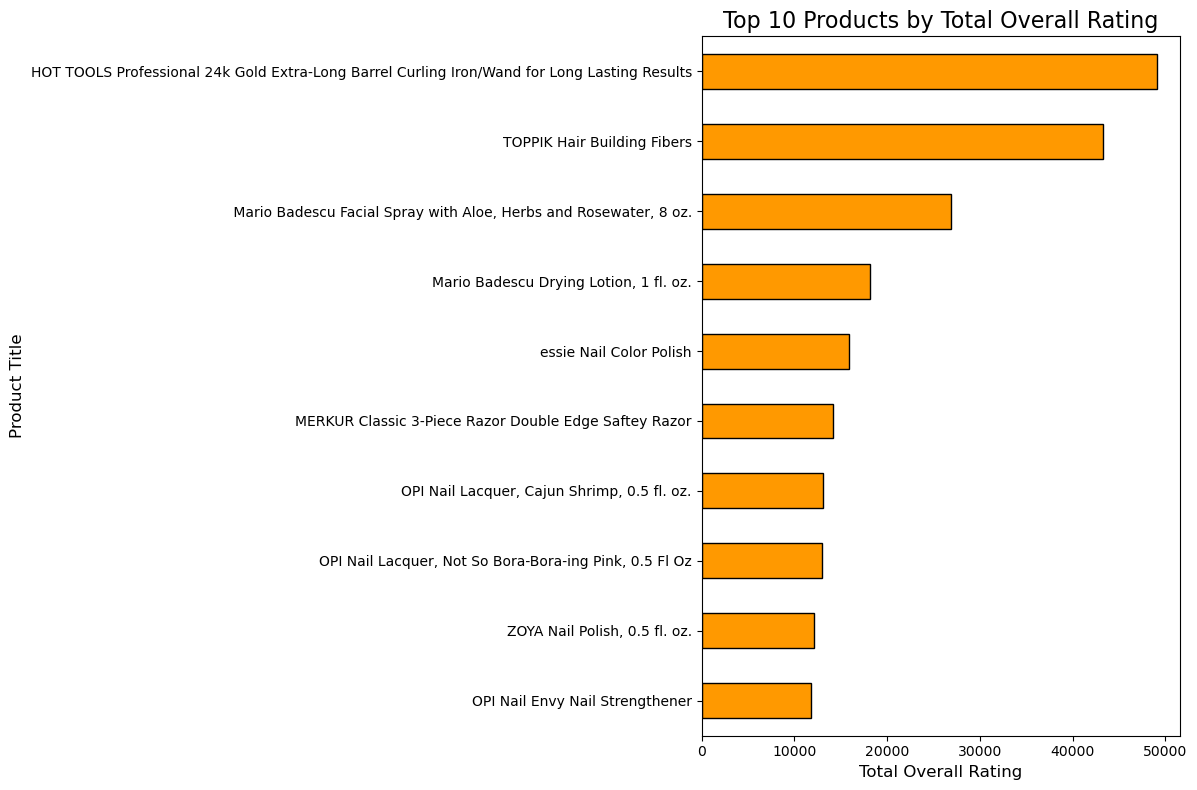

In [71]:
import matplotlib.pyplot as plt

# Sort the data in descending order
top_10_products = top_10_products.sort_values()

# Create a horizontal bar plot to visualize the top 10 products
plt.figure(figsize=(12, 8))
top_10_products.plot(kind='barh', color='#FF9900', edgecolor='black')

# Title and labels
plt.title('Top 10 Products by Total Overall Rating', fontsize=16)
plt.xlabel('Total Overall Rating', fontsize=12)
plt.ylabel('Product Title', fontsize=12)

# Adjust the y-axis labels for better visibility
plt.yticks(rotation=0)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [72]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 534602 entries, 0 to 534601
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   asin             534602 non-null  object 
 1   title            534602 non-null  object 
 2   overall          534602 non-null  float64
 3   price            534602 non-null  object 
 4   imageURLHighRes  534602 non-null  object 
 5   year             534602 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 28.6+ MB


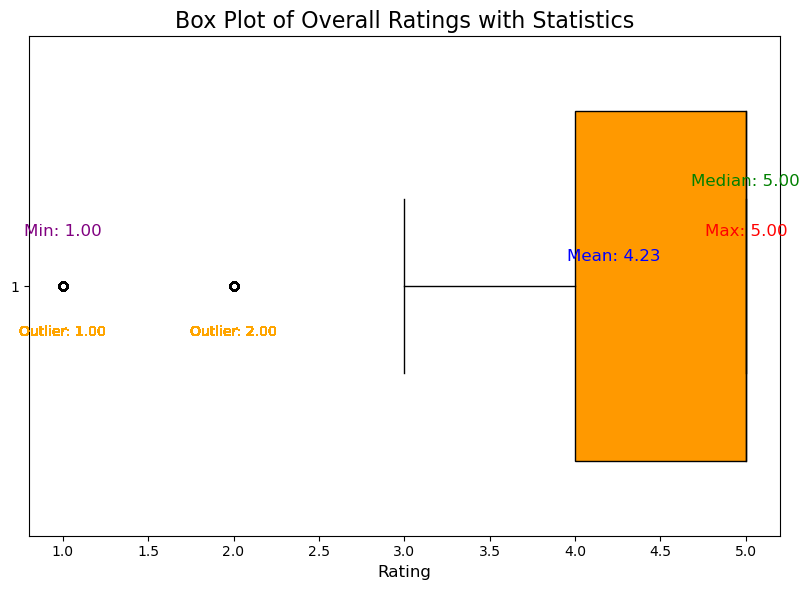

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot of the overall ratings with color code #FF9900 for the box
plt.figure(figsize=(8, 6))

# Define box plot properties
boxprops = {'facecolor': '#FF9900'}
medianprops = {'color': 'black'}

# Create the box plot
box_plot = plt.boxplot(process_reviews['overall'], vert=False, widths=0.7, patch_artist=True, boxprops=boxprops, medianprops=medianprops)

# Title and labels
plt.title('Box Plot of Overall Ratings with Statistics', fontsize=16)
plt.xlabel('Rating', fontsize=12)

# Show the plot
plt.tight_layout()

# Calculate statistics
mean_value = np.mean(process_reviews['overall'])
median_value = np.median(process_reviews['overall'])
max_value = max(process_reviews['overall'])
min_value = min(process_reviews['overall'])

# Annotate mean, median, max, and min
plt.text(mean_value, 1.05, f'Mean: {mean_value:.2f}', ha='center', fontsize=12, color='blue')
plt.text(median_value, 1.2, f'Median: {median_value:.2f}', ha='center', fontsize=12, color='green')
plt.text(max_value, 1.1, f'Max: {max_value:.2f}', ha='center', fontsize=12, color='red')
plt.text(min_value, 1.1, f'Min: {min_value:.2f}', ha='center', fontsize=12, color='purple')

# Identify and label outliers
outliers = box_plot['fliers'][0].get_xdata()
for outlier in outliers:
    plt.text(outlier, 0.9, f'Outlier: {outlier:.2f}', ha='center', fontsize=10, color='orange')

plt.show()


NameError: name 'labels' is not defined

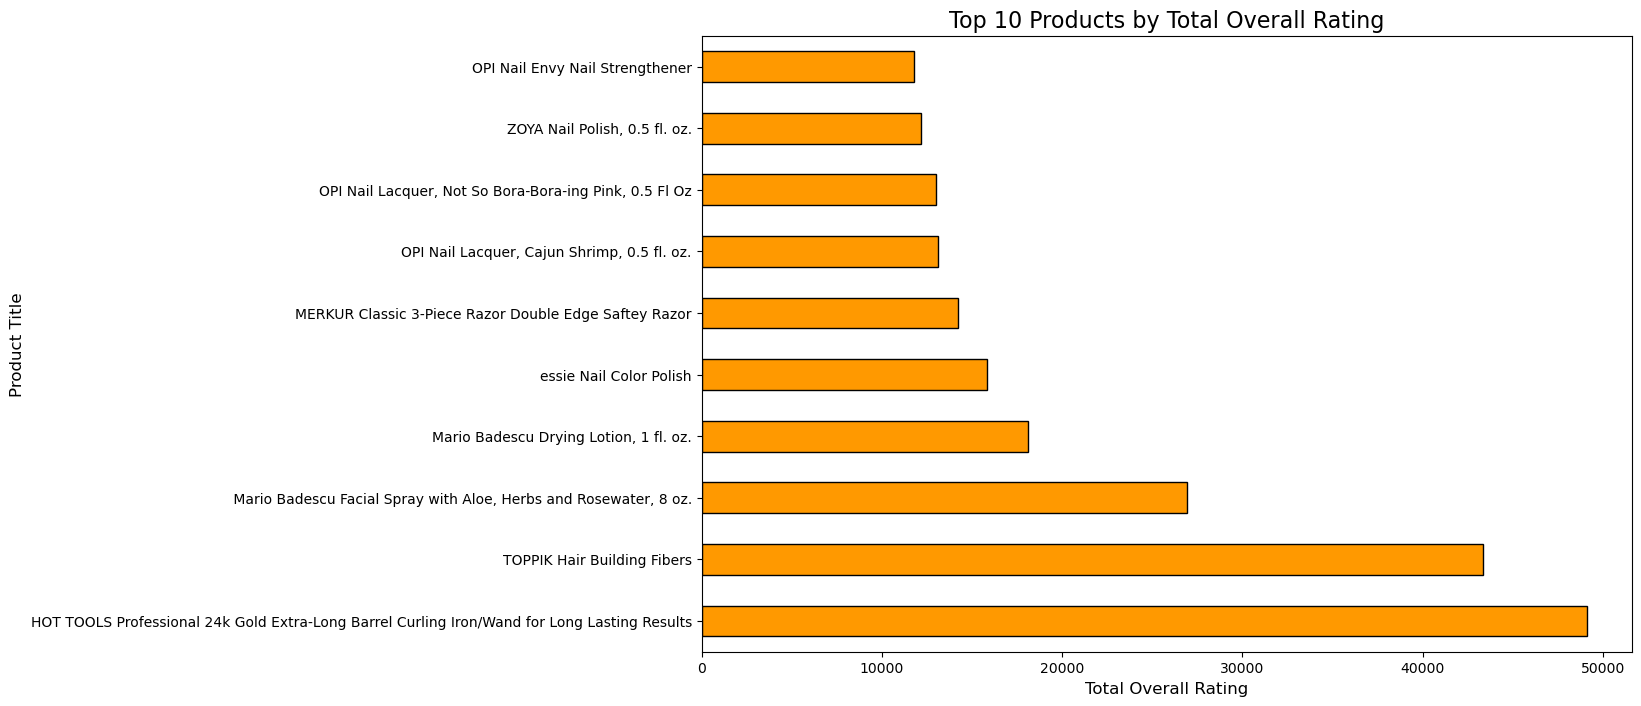

In [74]:
import matplotlib.pyplot as plt

# Assuming you have a Series named 'top_10_products' containing the top 10 products with their total overall ratings

# Sort the data in descending order
top_10_products = top_10_products.sort_values(ascending=False)

# Create a horizontal bar plot to visualize the top 10 products
plt.figure(figsize=(12, 8))
top_10_products.plot(kind='barh', color='#FF9900', edgecolor='black')

# Title and labels
plt.title('Top 10 Products by Total Overall Rating', fontsize=16)
plt.xlabel('Total Overall Rating', fontsize=12)
plt.ylabel('Product Title', fontsize=12)

# Set the modified labels
plt.yticks(range(10), labels)

# Show the plot
plt.tight_layout()
plt.show()


In [76]:
reviewer_counts = df['reviewerID'].value_counts()
most_reviews_reviewer = reviewer_counts.idxmax()
most_reviews_count = reviewer_counts.max()

print(f"ReviewerID with the most reviews: {most_reviews_reviewer}")
print(f"Number of reviews: {most_reviews_count}")


NameError: name 'df' is not defined

In [75]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'reviewerID' and 'overall'

# Group the data by 'reviewerID' and calculate the total number of ratings for each reviewer
reviewer_ratings = merged_df['reviewerID'].value_counts()

# Sort the reviewers by the total number of ratings in descending order
sorted_reviewers = reviewer_ratings.sort_values(ascending=False)

# Select the top 50 reviewers
top_50_reviewers = sorted_reviewers.head(10)

# Create a line chart
plt.figure(figsize=(12, 8))
plt.plot(top_50_reviewers.index, top_50_reviewers.values, marker='o', color='#FF9900')

# Title and labels
plt.title('Top 50 Reviewers by Total Number of Ratings', fontsize=16)
plt.xlabel('Reviewer ID', fontsize=12)
plt.ylabel('Total Number of Ratings', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

KeyError: 'reviewerID'

In [ ]:
process_reviews.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the 'top_product_titles' Series as mentioned in the previous response

# Create a horizontal bar plot to visualize the top 50 product titles
plt.figure(figsize=(12, 8))
top_product_titles.sort_values(ascending=True).plot(kind='barh', color='#FF9900', edgecolor='black')

# Title and labels
plt.title('Top 10 Product Titles with Most Overall Ratings', fontsize=16)
plt.xlabel('Total Overall Ratings', fontsize=12)
plt.ylabel('Product Title', fontsize=12)

# Adjust the y-axis labels for better visibility
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Assuming your DataFrame is named process_reviews

# Group the data by 'title' and sum the 'overall' ratings for each product
top_product_titles = merged_df.groupby('title')['reviews'].sum()

# Sort the result in descending order to find the top-rated product titles
top_product_titles = top_product_titles.sort_values(ascending=False).head(10)

# The 'top_product_titles' Series contains the top 50 product titles with the most overall ratings


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the 'top_product_titles' Series as mentioned in the previous response

# Create a horizontal bar plot to visualize the top 50 product titles
plt.figure(figsize=(12, 8))
top_product_titles.sort_values(ascending=True).plot(kind='barh', color='#FF9900', edgecolor='black')

# Title and labels
plt.title('Top 50 Product Titles with Most Overall Ratings', fontsize=16)
plt.xlabel('Total Overall Ratings', fontsize=12)
plt.ylabel('Product Title', fontsize=12)

# Adjust the y-axis labels for better visibility
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
merged_df.info()

NameError: name 'merged_df' is not defined

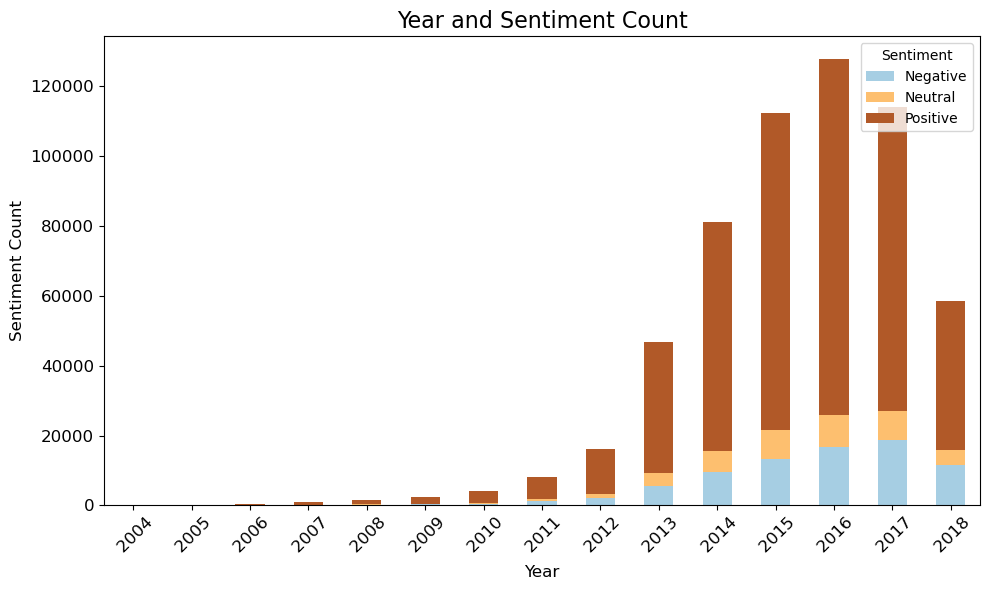

In [55]:
ax = process_reviews.groupby(['year', 'sentiment'])['sentiment'].count().unstack().plot(kind='bar', stacked=True, legend=True, colormap='Paired', figsize=(10, 6))

# Title and labels
ax.set_title('Year and Sentiment Count', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sentiment Count', fontsize=12)

# Add a legend with labels
ax.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'], loc='upper right')

# Adjust the x-axis and y-axis labels
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()

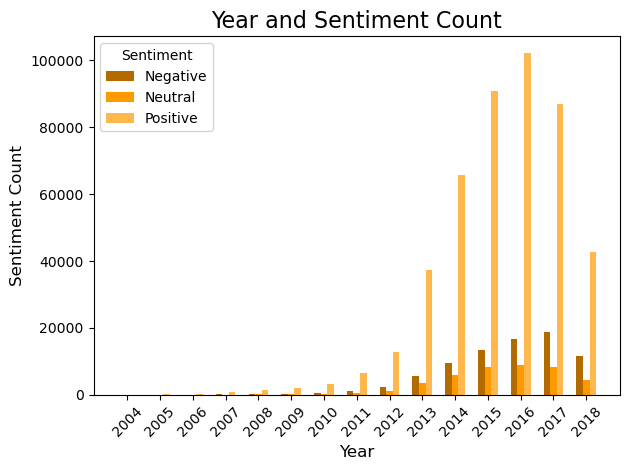

In [106]:
grouped = process_reviews.groupby(['year', 'sentiment'])['sentiment'].count().unstack()

# Set the width of each bar
bar_width = 0.2

# Create an array of year values for positioning the bars
years = np.arange(len(grouped))

# Create individual bars for each sentiment category with the specified color code and shades
plt.bar(years - bar_width, grouped['Negative'], bar_width, label='Negative', color='#b36b00')
plt.bar(years, grouped['Neutral'], bar_width, label='Neutral', color='#FF9900')
plt.bar(years + bar_width, grouped['Positive'], bar_width, label='Positive', color='#ffb84d')

# Set the labels for the x-axis
plt.xticks(years, grouped.index, rotation=45)

# Title and labels
plt.title('Year and Sentiment Count', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sentiment Count', fontsize=12)

# Add a legend
plt.legend(title='Sentiment')

# Show the plot
plt.tight_layout()
plt.show()


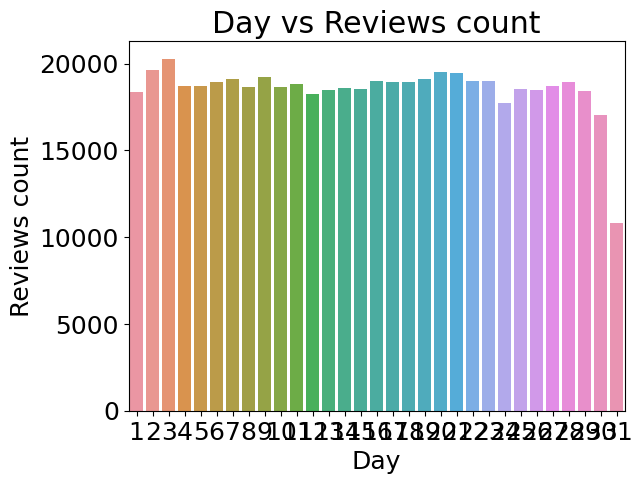

In [36]:
#Creating a dataframe
day=pd.DataFrame(process_reviews.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

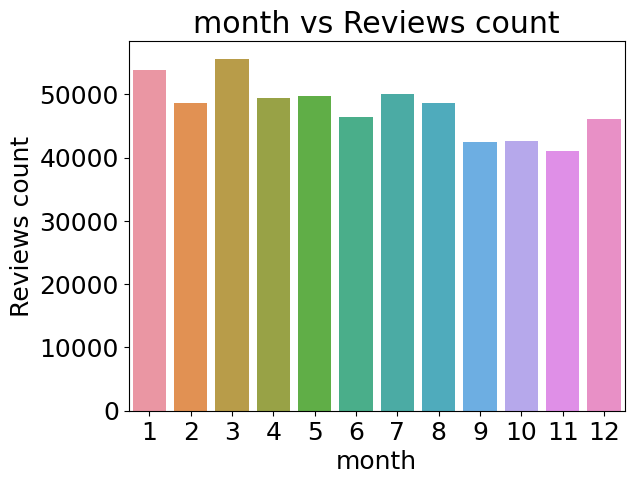

In [37]:
#Creating a dataframe
month=pd.DataFrame(process_reviews.groupby('month')['reviews'].count()).reset_index()
month['month']=month['month'].astype('int64')
month.sort_values(by=['month'])

#Plotting the graph
sns.barplot(x="month", y="reviews", data=month)
plt.title('month vs Reviews count')
plt.xlabel('month')
plt.ylabel('Reviews count')
plt.show()

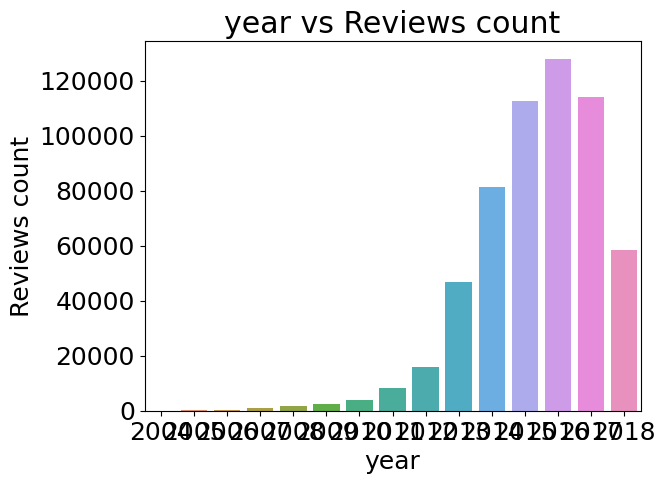

In [41]:
#Creating a dataframe
year=pd.DataFrame(process_reviews.groupby('year')['reviews'].count()).reset_index()
year['year']=year['year'].astype('int64')
year.sort_values(by=['year'])

#Plotting the graph
sns.barplot(x="year", y="reviews", data=year)
plt.title('year vs Reviews count')
plt.xlabel('year')
plt.ylabel('Reviews count')
plt.show()

In [43]:
reviewer_counts = process_reviews['reviewerID'].value_counts()
multiple_reviewers = reviewer_counts[reviewer_counts > 1].index.tolist()
print(multiple_reviewers)

['A2GJX2KCUSR0EI', 'AJL6HX8O2QLVO', 'A1O4PNHACFEDEM', 'A11Z3ANM4PQFMH', 'AJC7TSNP5UAWN', 'A2NT1LGR2BYP0I', 'A18VCM7Y7HK6EW', 'A3NQA378KXTZQM', 'A3NMQEQPT5LDIA', 'A2H6LHCM3AR3YV', 'A2V1MAUHH1YHKK', 'A2V5R832QCSOMX', 'AHN86VFJIJ2JP', 'A3091RP0SPZLMN', 'AQY5XBYSENNZQ', 'AENH50GW3OKDA', 'A2JR5ZTSYSIQYX', 'A2OW1FKQFPIA5D', 'A2YKWYC3WQJX5J', 'A2LW5AL0KQ9P1M', 'AW6J9IILGOZY3', 'A1KSC91G9AIY2Z', 'A2ZY49IDE6TY5I', 'AOEUN9718KVRD', 'A1TPW86OHXTXFC', 'A15T9G38F589KM', 'A19KLUZ1XD3SRN', 'AJRFZ0VZ0LD26', 'A2R1HUYHXV7H18', 'A25QBCHO0KFT0P', 'AJX9A4Q19UTJU', 'A2BU0OBCKFDUKE', 'AMB2Z4FMDBWQY', 'A2503LT8PZIHAD', 'A6VPK7X53QNAQ', 'A2L6BT1PVV9YN0', 'A3JV4PJZD5O4NJ', 'A5BJMAHZWGJ7N', 'A2JCJJNY43QQIV', 'A3EAP2VG0BVYWX', 'A1QBOC76MIOJYP', 'A2OCDK0BOW6UCY', 'A1V1EP514B5H7Y', 'A1M04H40ZVGWVG', 'A1LUK8APLC16WK', 'AQ6AGWKWMTY8H', 'A2V92F5R7MLCVI', 'A2QNMPNXW1QAQ5', 'A2G04D4QZAXL15', 'A2SH7OWE8QJYNC', 'A2LAS014NSRW72', 'A3KEZLJ59C1JVH', 'A2GA64WZK8PKBC', 'ACJ9N7ED37HXS', 'A3CG93783LP0FO', 'A5P60H1YBPXBE', 'AWP3O

In [44]:
reviewer_id = 'A2GJX2KCUSR0EI'
reviews_by_reviewer = process_reviews[process_reviews['reviewerID'] == reviewer_id]

# Display the reviews by the specified reviewer
print(reviews_by_reviewer)

        overall  vote  verified      reviewerID        asin  \
12389       4.0   3.0     False  A2GJX2KCUSR0EI  B00021DBA8   
13329       5.0   5.0     False  A2GJX2KCUSR0EI  B00021DEY6   
17747       3.0   3.0     False  A2GJX2KCUSR0EI  B0002NXRVY   
27786       5.0   3.0     False  A2GJX2KCUSR0EI  B0006PJRVM   
28112       5.0   0.0     False  A2GJX2KCUSR0EI  B0006PJRVM   
...         ...   ...       ...             ...         ...   
561877      5.0  14.0      True  A2GJX2KCUSR0EI  B00Y0XHESE   
565099      5.0   4.0     False  A2GJX2KCUSR0EI  B014D62FY0   
565100      4.0  12.0      True  A2GJX2KCUSR0EI  B014D62E3M   
565895      5.0   4.0      True  A2GJX2KCUSR0EI  B015ENQBRS   
568318      5.0   0.0      True  A2GJX2KCUSR0EI  B01871S7M6   

                                                  reviews sentiment   year  \
12389   huge fan product ill finish off first box tomo...  Positive   2016   
13329   review color cannes light peachyorange color p...  Positive   2015   
17747   r

In [46]:
len(reviews_by_reviewer)

129